# Problem 5

example A

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
def generate_1d_data(n_samples, means, variances, weights, random_state=42):
    np.random.seed(random_state)

    K = len(weights)
    cluster_indices = np.random.choice(range(K), size=n_samples, p=weights)
    # initialization
    X = np.zeros(n_samples)
    true_labels = np.zeros(n_samples, dtype=int)

    cluster_indices = np.random.choice(
        range(K), size=n_samples, p=weights
    )

    for k in range(K):
        num_k = np.sum(cluster_indices == k)
        if num_k > 0:
            X_k = np.random.normal(means[k], variances[k], num_k)
            X[cluster_indices == k] = X_k
            true_labels[cluster_indices == k] = k

    return X, true_labels


def plot_data(X, labels, centroids=None, title="Data"):
    plt.figure()
    plt.scatter(X, np.zeros_like(X), c=labels, alpha=0.6)

    if centroids is not None:
        plt.scatter(centroids, np.zeros_like(centroids),
                    marker='x', s=200)

    plt.title(title)
    plt.xlabel("X1")
    plt.show()

In [ ]:
n_samples = 100
# means
means = [0.0, 5.0, -5.0]
# variance
variances = [0.8, 0.3, 0.5]
weights = [0.3, 0.4, 0.3]


X, true_labels = generate_1d_data(n_samples, means, variances, weights, random_state=42)

value_counts = pd.Series(true_labels).value_counts()
X.shape, true_labels.shape, X, value_counts


((100,),
 (100,),
 array([-0.54401978,  4.93296116,  5.21420015,  5.14197129, -4.6568699 ,
         0.18580296,  4.97815133, -5.80635794,  0.23445798, -0.57148113,
         1.49261961,  0.37906634, -5.23596593, -4.4555247 ,  4.74596188,
        -4.96785999, -5.53887239, -0.9530428 , -5.35765185,  4.54554583,
        -4.66020113, -5.36518332,  4.86604551,  0.52524289, -0.77974534,
         5.25691964, -4.89177071, -4.97721408,  0.62966768,  5.06422812,
         4.62627837,  0.92687646, -0.65654585,  5.05195428, -5.32580017,
         5.11559521,  4.73484277, -3.92802796,  5.04611753, -4.68304049,
        -6.01257129,  0.7707009 ,  5.01746262,  4.65710891,  0.33022474,
         0.65764813,  5.10733621,  5.16823536,  1.51743439, -0.19631049,
        -4.90677284, -0.60298893, -0.71161154,  5.32491537, -5.33089323,
        -0.65264823,  5.31614062, -4.57378333, -0.06168137, -5.39626037,
         4.58669919,  4.71865249,  5.15451058,  5.15413579,  0.27292158,
        -5.05736822,  5.15451431,

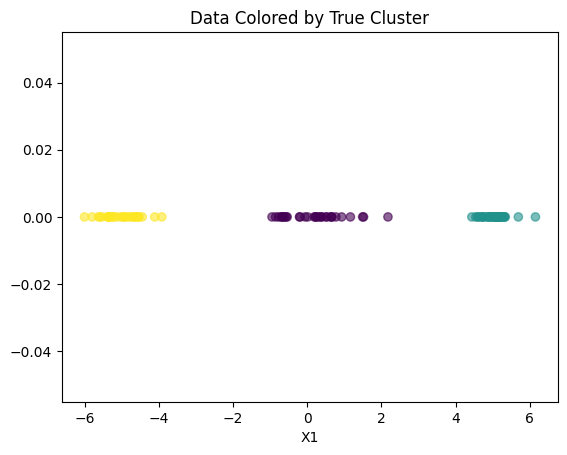

In [ ]:
# plot at a single line
plot_data(X, labels=true_labels, title="Data Colored by True Cluster")

GMM

predicted means [[-5.0286818 ]
 [ 5.04403282]
 [ 0.17366802]]


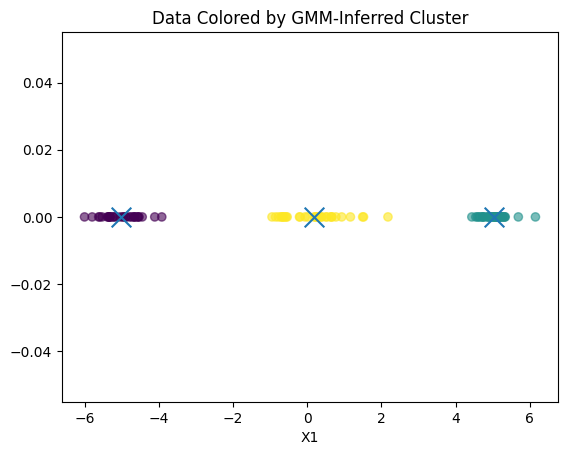

In [ ]:
# reshape (n_samples, 1)
X = X.reshape(-1, 1)

#gmm
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)


predicted_labels = gmm.predict(X)
pred_centers = gmm.means_

print("predicted means", pred_centers)

plot_data(X, labels=predicted_labels, centroids=pred_centers,
          title="Data Colored by GMM-Inferred Cluster")



Example B

In [ ]:
n_samples_b = 100
# means
means_b = [2.0, 0.0, -2.0]
# variance
variances_b = [1.0, 2.0, 0.5]
weights_b = [0.85, 0.05, 0.10]

X_b, true_labels_b = generate_1d_data(n_samples_b, means_b, variances_b, weights_b, random_state=42)

value_counts_b = pd.Series(true_labels_b).value_counts()
X_b.shape, true_labels_b.shape, X_b, value_counts_b

((100,),
 (100,),
 array([ 1.31997528,  2.2322537 ,  2.29307247,  1.28564858, -1.74750636,
         3.86577451,  2.47383292,  0.8086965 ,  2.65655361,  1.02531833,
         2.7870846 ,  3.15859558, -1.5671224 ,  1.17931768,  2.96337613,
         4.28788818,  2.41278093,  2.82206016,  1.26783804,  3.89679298,
         1.75461188, -4.05028517,  1.24626384,  1.11048557,  1.18418972,
         1.92289829,  2.34115197,  0.37290863,  2.2766908 ,  2.82718325,
         2.01300189,  3.45353408,  1.73534317,  4.72016917, -2.6001482 ,
         2.62566735,  1.14284244,  0.9291075 ,  2.48247242, -2.16725062,
        -2.23747266,  1.77653721,  2.71400049,  2.47323762,  1.92717109,
         1.15320628,  0.48515278,  1.55348505,  2.85639879,  2.21409374,
        -2.32666462,  0.75426122,  2.17318093,  2.38531738, -1.11727288,
         1.11614256,  2.15372511,  2.05820872,  0.8570297 ,  2.35778736,
         2.56078453,  3.08305124,  3.05380205,  0.62233063,  1.06217496,
         2.51503527,  2.51378595,

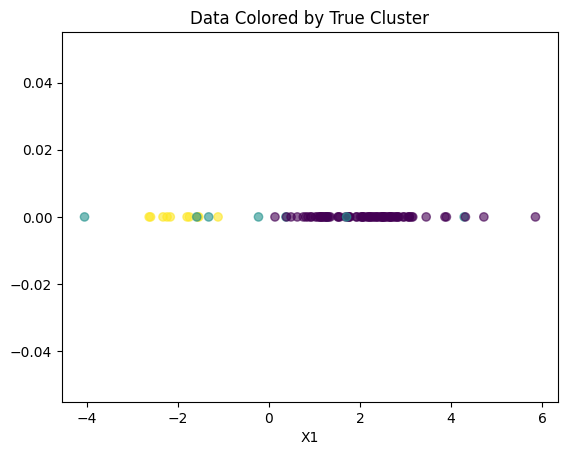

In [ ]:
# plot at a single line
plot_data(X_b, labels=true_labels_b, title="Data Colored by True Cluster")

predicted means [[ 1.41192513]
 [ 2.40152758]
 [-2.01370249]]


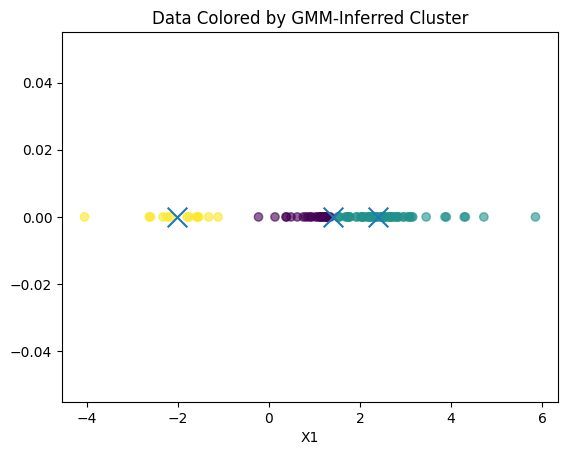

In [ ]:
# reshape (n_samples, 1)
X_b = X_b.reshape(-1, 1)

#gmm
gmm_b = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm_b.fit(X_b)


predicted_labels_b = gmm_b.predict(X_b)
pred_centers_b = gmm_b.means_

print("predicted means", pred_centers_b)

plot_data(X_b, labels=predicted_labels_b, centroids=pred_centers_b,
          title="Data Colored by GMM-Inferred Cluster")

Initialization 500 times

predicted means [[ 2.07850635]
 [-4.05028517]
 [-1.89544391]]


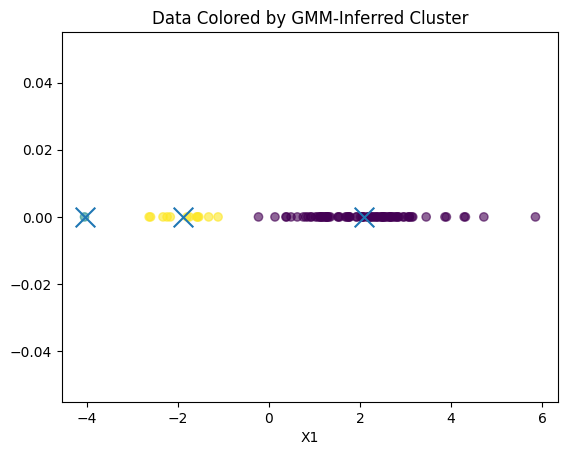

In [ ]:
# reshape (n_samples, 1)
X_b = X_b.reshape(-1, 1)

#gmm
gmm_b = GaussianMixture(n_components=3, n_init=500, covariance_type='diag', random_state=42)
gmm_b.fit(X_b)


predicted_labels_b = gmm_b.predict(X_b)
pred_centers_b = gmm_b.means_

print("predicted means", pred_centers_b)

plot_data(X_b, labels=predicted_labels_b, centroids=pred_centers_b,
          title="Data Colored by GMM-Inferred Cluster")

# Problem 6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/sample_data/SMSSpamCollection', sep='\t', names=['label', 'message'], header=None)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
X = df['message']
y = df['label']

vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

In [ ]:
# train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train, y_train,
                         cv=kf,        #KFold
                         scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.98654709 0.97757848 0.98430493 0.97309417 0.97309417 0.98430493
 0.98878924 0.97977528 0.97303371 0.98202247]
Mean accuracy: 0.9802544465158463


Predict

In [ ]:
# predict
y_pred = clf.predict(X_test)

# evaluate
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9856502242152466
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Problem 7

In [ ]:
df_7 = pd.read_csv('/content/sample_data/faithful.csv')
df_7.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
def plot_data_2d(X, labels, centroids=None, title="Data"):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.6)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=200)

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [ ]:
def plot_measure(n_components_range, bics, aics):
    #plot BIC / AIC
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(n_components_range, bics, marker='o')
    plt.title('BIC vs. n_components')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')

    plt.subplot(1, 2, 2)
    plt.plot(n_components_range, aics, marker='o', color='r')
    plt.title('AIC vs. n_components')
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')

    plt.tight_layout()
    plt.show()

In [ ]:
X_7 = df_7[['eruptions', 'waiting']].values

In [ ]:
def gmm_n(X, range):
  bics = []
  aics = []
  models = []

  for n in range:
    # train model
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))
    models.append(gmm)
    # get labels
    predicted_labels = gmm.predict(X)
    pred_centers = gmm.means_

    # plot
    print(f'Details for {n} components: \n')
    print("predicted means \n", pred_centers)
    plot_data_2d(X, labels=predicted_labels, centroids=pred_centers,
          title="Data Colored by GMM-Inferred Cluster")
  # plot measure for the GMM model
  print('Measurement')
  plot_measure(range, bics, aics)



set choices of the number of components from 2 to 10

Details for 2 components: 

predicted means 
 [[ 4.28977944 79.96953298]
 [ 2.03652149 54.47986018]]


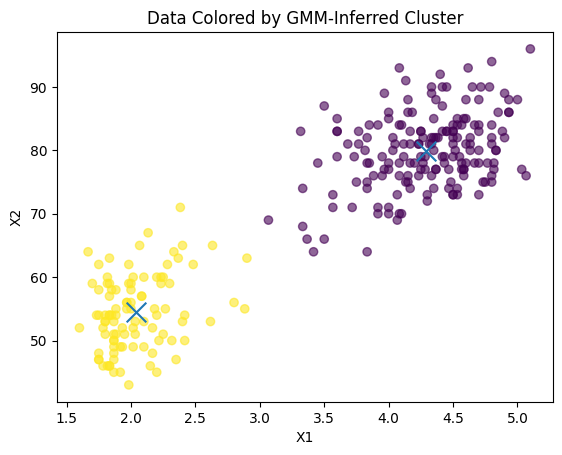

Details for 3 components: 

predicted means 
 [[ 4.29235569 83.62497808]
 [ 2.03312329 54.44576977]
 [ 4.28075504 76.02678163]]


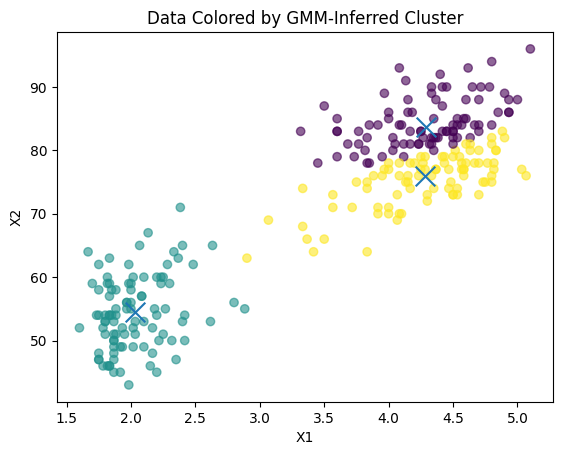

Details for 4 components: 

predicted means 
 [[ 4.23988371 84.34849717]
 [ 2.5896401  61.85446301]
 [ 4.37592917 77.67775509]
 [ 1.96486952 53.11996512]]


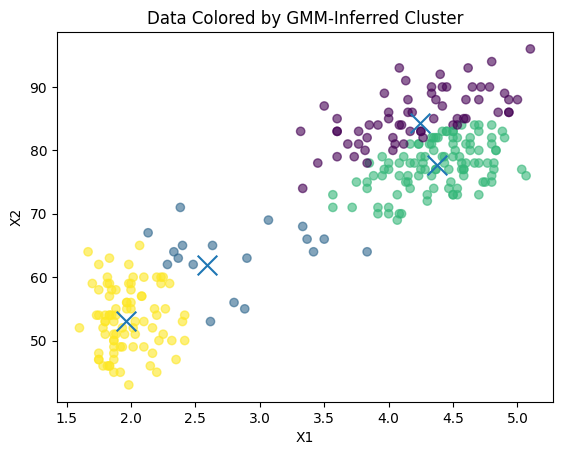

Details for 5 components: 

predicted means 
 [[ 4.2414935  84.75642796]
 [ 2.18625171 56.22623755]
 [ 4.42649486 78.90954056]
 [ 1.86296458 52.46279663]
 [ 3.868682   70.86001832]]


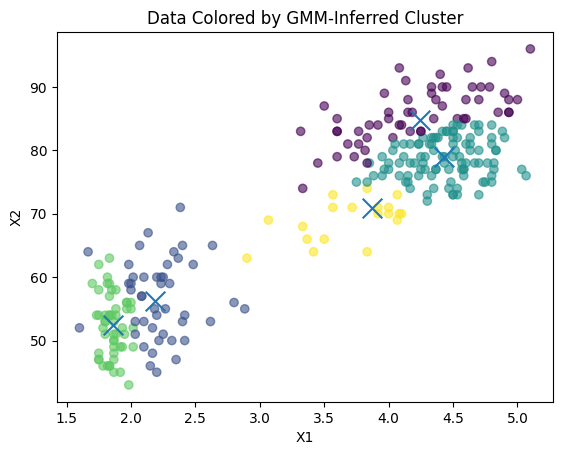

Details for 6 components: 

predicted means 
 [[ 4.54905486 88.27240067]
 [ 2.174717   56.21289339]
 [ 4.31772976 77.21491573]
 [ 1.86118717 52.29591031]
 [ 3.81596997 70.05079044]
 [ 4.26843745 82.63347549]]


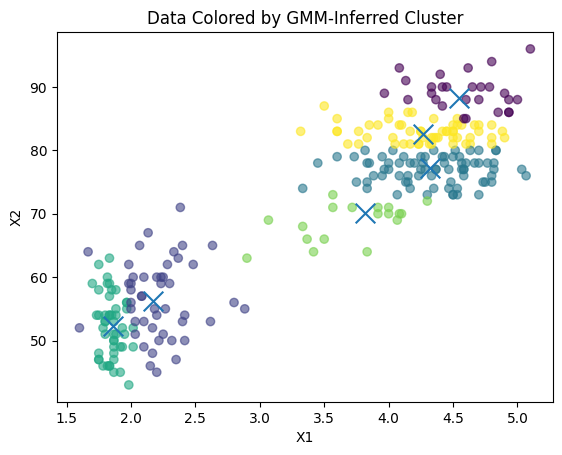

Details for 7 components: 

predicted means 
 [[ 4.54837423 88.389166  ]
 [ 2.03454947 59.6348997 ]
 [ 4.32346057 77.1208078 ]
 [ 1.94092878 48.02455004]
 [ 3.85198737 70.73001012]
 [ 4.28472789 82.51350212]
 [ 2.10304436 53.20125496]]


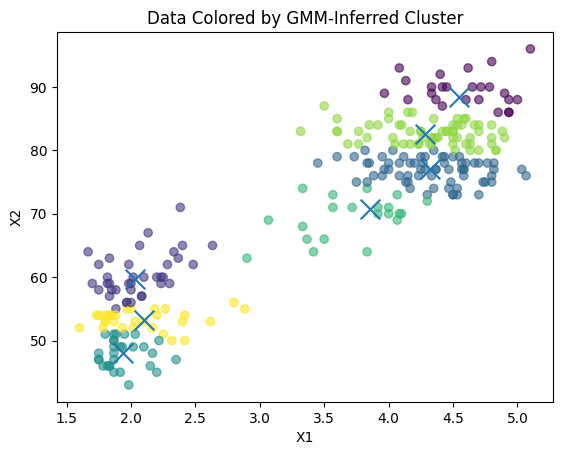

Details for 8 components: 

predicted means 
 [[ 4.5466871  87.89313126]
 [ 2.16848172 55.85739254]
 [ 4.31962284 77.70208614]
 [ 1.86173793 52.26423027]
 [ 3.81993339 70.08492231]
 [ 4.28616713 82.18246051]
 [ 4.24609304 74.45542779]
 [ 3.03195721 64.49231629]]


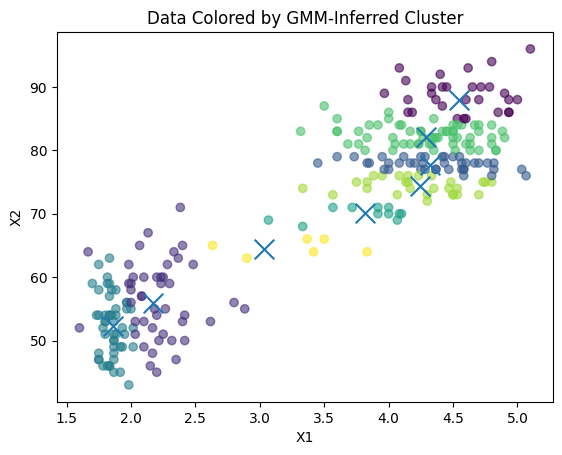

Details for 9 components: 

predicted means 
 [[ 4.54062725 88.14653768]
 [ 2.0013673  58.68852409]
 [ 4.31783264 77.76156043]
 [ 1.97255799 48.70879202]
 [ 3.70232089 70.22498576]
 [ 4.29332426 82.28748352]
 [ 4.25087423 74.42529594]
 [ 2.61142368 64.33065176]
 [ 2.06580682 53.82357075]]


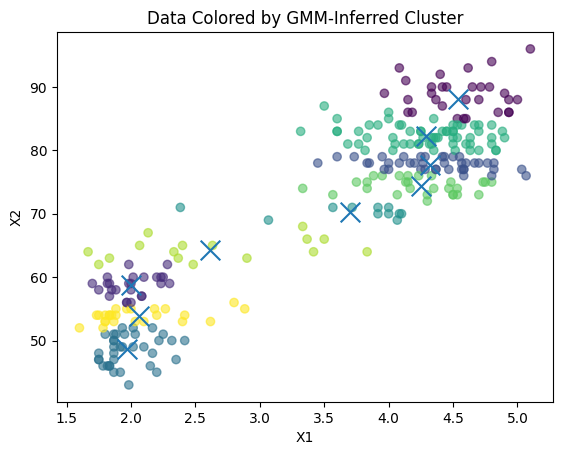

Measurement


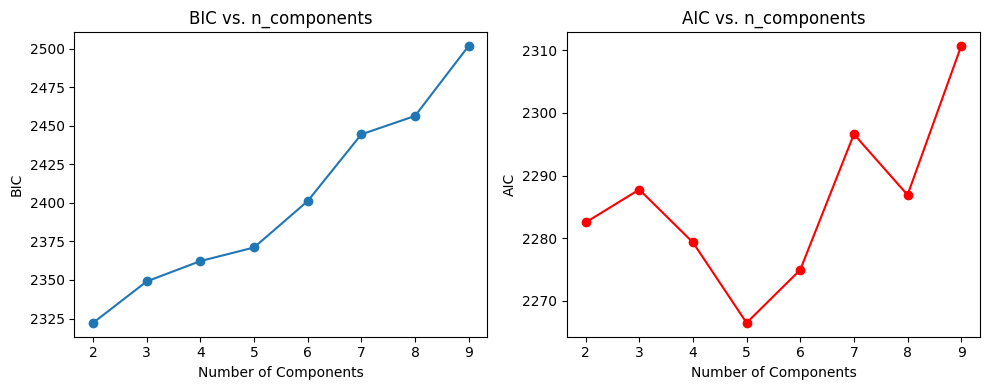

In [ ]:
gmm_n(X_7, range(2,10))